# Wallmart Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm as n
from statsmodels.graphics.gofplots import qqplot

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\Wallmart\wallmart.csv")

## Basic Analysis and understanding the data

### 1. Observation of the data


In [3]:
# Display the first few rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.shape

(550068, 10)

In [5]:
# Get an overview of the dataset's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
# Summary statistics of numerical columns
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
# Uniques values and it's count unique fo all the columns
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [8]:
# Count of unique values in categorical columns
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print()

Unique values in Gender:
M    414259
F    135809
Name: Gender, dtype: int64

Unique values in Age:
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

Unique values in Occupation:
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

Unique values in City_Category:
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Unique values in Stay_In_Current_City_Years:
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

Unique values in Marital_Status:
0    324731
1    225337
Name: Marital_Status, dtype: int64

Unique values in Product_Category:
5     150933
1     140378
8     113925
11     24287
2      238

In [9]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

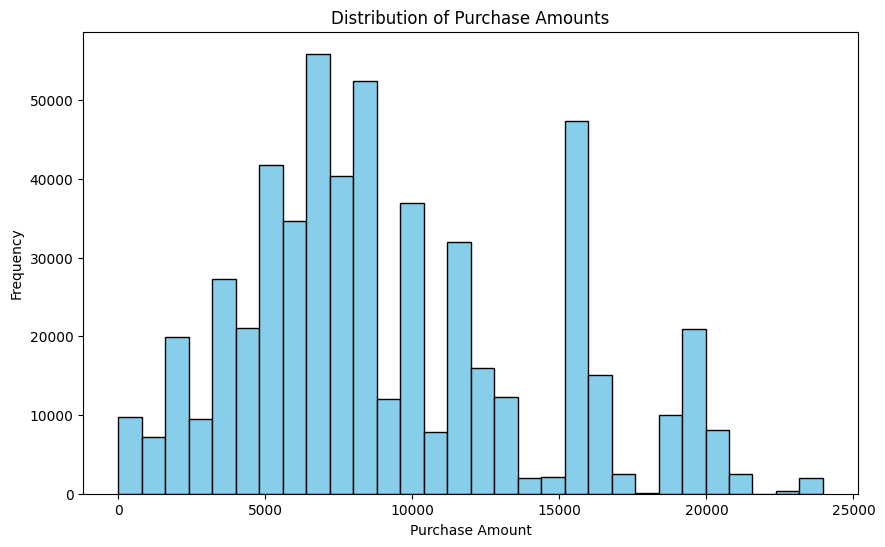

In [10]:
# Visualize the distribution of Purchase amounts
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amounts')
plt.show()

### 2. Outliers and Null values

#### a. Null values

In [11]:
df.isna().sum()/df.shape[0]*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

#### b. Outliers

<Axes: xlabel='Gender', ylabel='Purchase'>

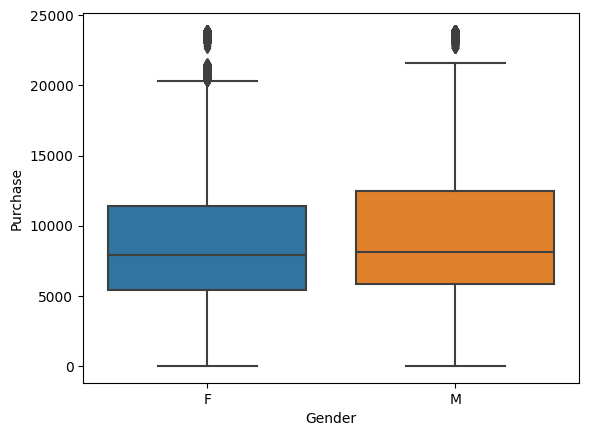

In [12]:
sns.boxplot(data = df, x = 'Gender', y = 'Purchase')

<Axes: xlabel='Age', ylabel='Purchase'>

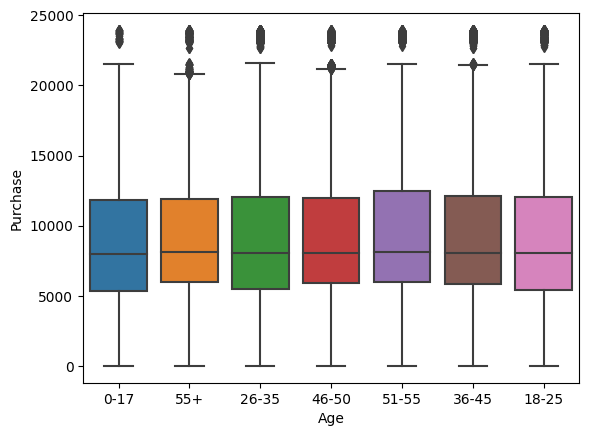

In [13]:
sns.boxplot(data = df, x = 'Age', y = 'Purchase')

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

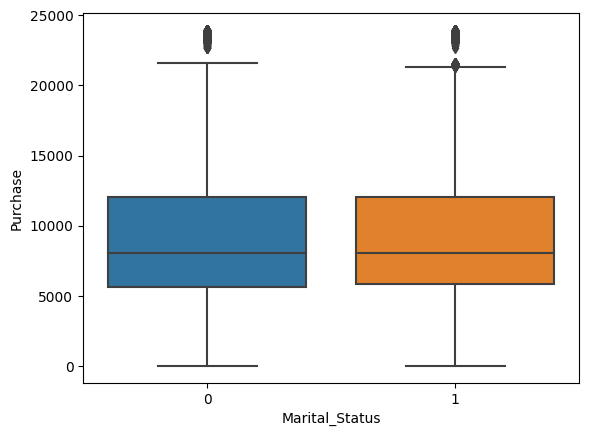

In [14]:
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase')

### 3. Do some data exploration steps:

#### a. Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [15]:
# Filter the data for Male and Female customers
male_data = df.loc[df['Gender'] == 'M']
female_data = df.loc[df['Gender'] == 'F']

In [16]:
average_spending_male = round(male_data['Purchase'].mean(),2)
average_spending_female = round(female_data['Purchase'].mean(),2)

In [17]:
print('Average spending for Male customers:', average_spending_male)
print('Average spending for Female customers:', average_spending_female)

Average spending for Male customers: 9437.53
Average spending for Female customers: 8734.57


#### b. Inference after computing the average female and male expenses.

- The data suggests that, on average, male customers tend to spend more during Black Friday transactions compared to female customers. The average spending of male customers is higher by approximately 700 dollars.
- Based on the observed spending habits, Walmart could consider tailoring their marketing strategies to cater to the preferences of each gender. For example, they might offer promotions or products that are more appealing to male customers' spending patterns during Black Friday.
- While the difference in average spending between male and female customers is observable, it's also important to perform statistical tests to determine if this difference is statistically significant. Confidence intervals, hypothesis testing, and p-values can provide a better understanding of the significance of the observed differences.

#### c. Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

In [18]:
#Calculate the mean and standard deviation of purchase amounts for the female customers.
sample_mean = female_data['Purchase'].mean()
sample_std = female_data['Purchase'].std()
sample_size = len(female_data)
standard_error = sample_std/np.sqrt(sample_size)

In [19]:
# Calculate the lower and upper bounds of the confidence interval
lower, upper = n.interval(0.95, loc=sample_mean, scale = standard_error)
print('Confidence Interval of population may lie between:')
print(f'Lower Bound: {lower}')
print(f'Upper Bound: {upper}')

Confidence Interval of population may lie between:
Lower Bound: 8709.21154714068
Upper Bound: 8759.919983170272


### 4.	Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

In [20]:
# Bootstrapping the Male Data
bs_male_expenses_mean = []
bs_size = len(male_data)
for i in range(10000):
    bs_sample = np.random.choice(male_data['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_male_expenses_mean.append(bs_mean)

<Axes: ylabel='Count'>

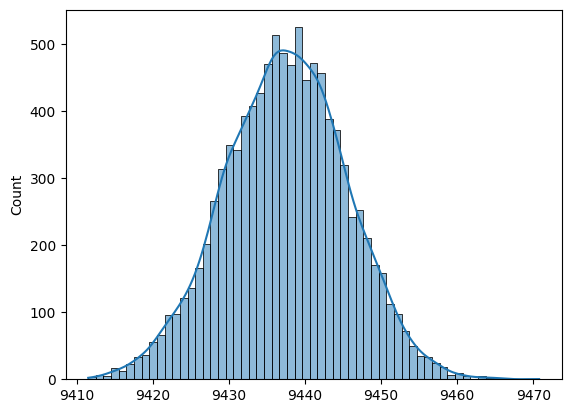

In [21]:
sns.histplot(bs_male_expenses_mean, kde = True)

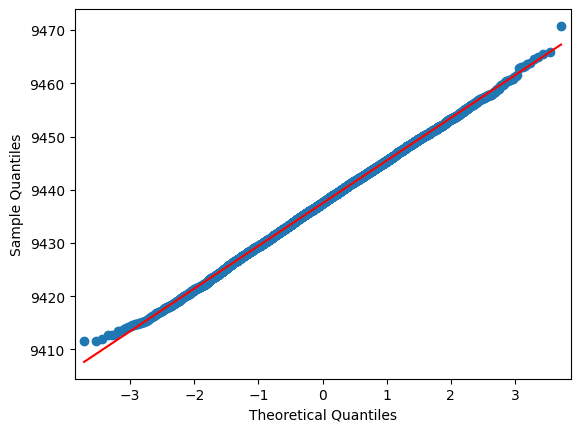

In [22]:
# Confirmation of the normal distrubution using the qqplot
qqplot(pd.Series(bs_male_expenses_mean), line = 's')
plt.show()

In [23]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_male_expenses_mean, 2.5),2)
upper = round(np.percentile(bs_male_expenses_mean, 97.5),2)
print(f'Confidence Interval of male expenses: {lower, upper}')

Confidence Interval of male expenses: (9421.5, 9452.98)


In [24]:
# Bootstrapping the Female Data
bs_female_expenses_mean = []
bs_size = int(len(female_data)/2)
for i in range(10000):
    bs_sample = np.random.choice(female_data['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_female_expenses_mean.append(bs_mean)

<Axes: ylabel='Count'>

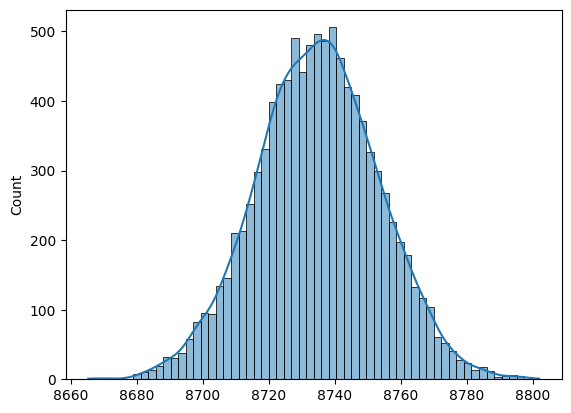

In [25]:
sns.histplot(bs_female_expenses_mean, kde = True)

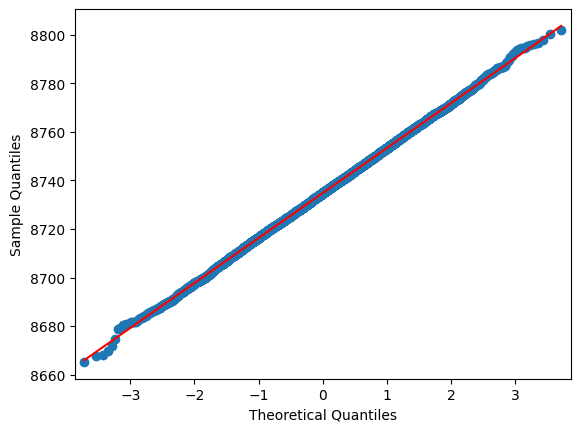

In [26]:
# Confirmation of the normal distrubution using the qqplot
qqplot(pd.Series(bs_female_expenses_mean), line = 's')
plt.show()

In [27]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_female_expenses_mean, 2.5),2)
upper = round(np.percentile(bs_female_expenses_mean, 97.5),2)
print(f'Confidence Interval of female expenses: {lower, upper}')

Confidence Interval of female expenses: (8698.32, 8770.67)


### 5.	Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

#### Confidence Interval of female expenses: (8699.35, 8771.08)
#### Confidence Interval of male expenses: (9422.39, 9453.0)

#### Insights:

#### Spending Patterns by Gender:

- The confidence interval for female customer expenses indicates that, with 95% confidence, the average spending of female customers falls within the range of approximately 8,699.35 dollars to 8,771.08 dollars.
- On the other hand, the confidence interval for male customer expenses suggests that, with 95% confidence, the average spending of male customers lies within the range of approximately 9,422.39 dollars to  9,453.00 dollars.

#### Significant Difference in Spending:

- The confidence intervals of female and male expenses do not overlap significantly. This indicates that there may be a notable difference in spending habits between genders on Black Friday.
- The lower end of the male expenses confidence interval is higher than the upper end of the female expenses confidence interval, suggesting that, on average, males tend to spend more than females.

#### Business Implications:

- Walmart can leverage this insight to tailor marketing strategies and promotions specifically for each gender. Differentiating offers based on gender preferences and spending behavior can lead to more effective engagement and conversions.
- Targeted product placements and advertising can be designed to resonate better with each gender's preferences and needs.
- The observed spending patterns may also reflect specific product categories that are more appealing to each gender. Walmart can optimize its product assortment and stocking strategies accordingly.

#### Personalization and Customer Experience:

- By understanding the distinct spending patterns, Walmart can personalize the shopping experience further. Recommendations and promotions can be personalized based on gender, enhancing customer satisfaction and engagement.



In conclusion, the analysis highlights distinct spending patterns between female and male customers on Black Friday. Walmart can use these insights to optimize its marketing, product offerings, and customer engagement strategies to better cater to each gender's preferences and maximize sales.







### 6. Perform the same activity for Married vs Unmarried and Age

#### a. Married vs Unmarried

In [28]:
# Filter the data for Married and Unmarried customers
married_data = df.loc[df['Marital_Status'] == 1]
unmarried_data = df.loc[df['Marital_Status'] == 0]

In [29]:
bs_married_expenses_mean = []
bs_size = int(len(married_data)/3)
for i in range(10000):
    bs_sample = np.random.choice(married_data['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_married_expenses_mean.append(bs_mean)

<Axes: ylabel='Count'>

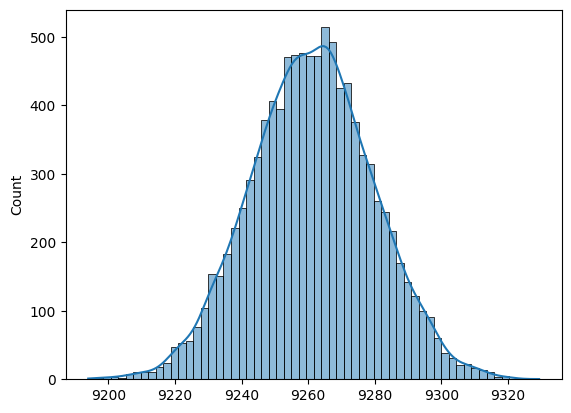

In [30]:
sns.histplot(data = bs_married_expenses_mean, kde = True)

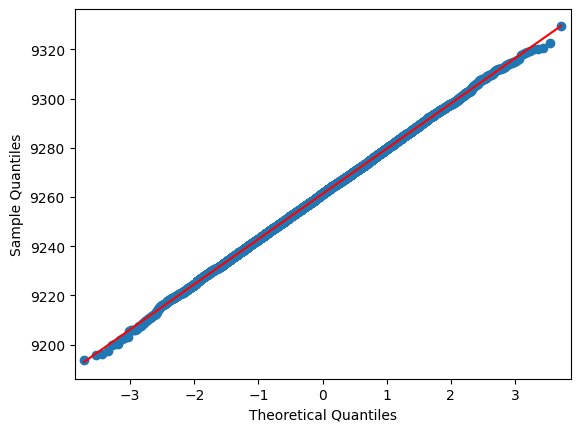

In [31]:
# Confirmation of the normal distrubution using the qqplot
qqplot(pd.Series(bs_married_expenses_mean), line = 's')
plt.show()

In [32]:
# Calculating the confidence interval at 80% confidence level
lower = round(np.percentile(bs_married_expenses_mean, 10),2)
upper = round(np.percentile(bs_married_expenses_mean, 90),2)
print(f'Confidence Interval of married customer spending: {lower, upper}')

Confidence Interval of married customer spending: (9237.81, 9285.0)


In [33]:
bs_unmarried_expenses_mean = []
bs_size = int(len(unmarried_data)/2)
for i in range(10000):
    bs_sample = np.random.choice(unmarried_data['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_unmarried_expenses_mean.append(bs_mean)

<Axes: ylabel='Count'>

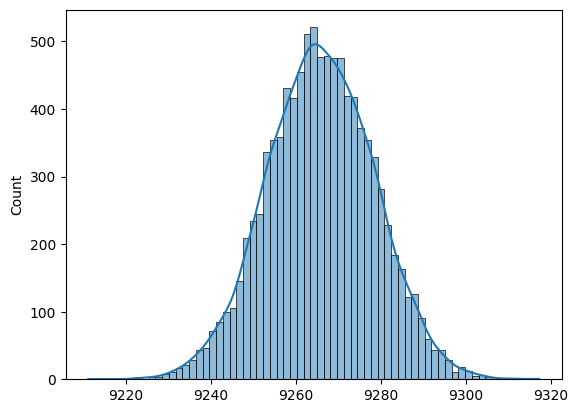

In [34]:
sns.histplot(data = bs_unmarried_expenses_mean, kde = True)

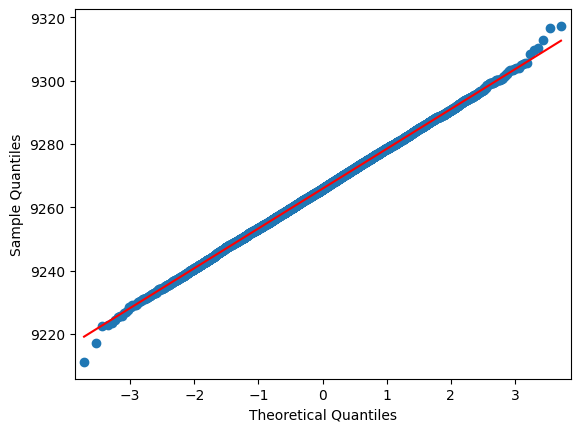

In [35]:
# Confirmation of the normal distrubution using the qqplot
qqplot(pd.Series(bs_unmarried_expenses_mean), line = 's')
plt.show()

In [36]:
# Calculating the confidence interval at 80% confidence level
lower = round(np.percentile(bs_unmarried_expenses_mean, 10),2)
upper = round(np.percentile(bs_unmarried_expenses_mean, 90),2)
print(f'Confidence Interval of unmarried customer spending: {lower, upper}')

Confidence Interval of unmarried customer spending: (9249.87, 9281.84)


#### Insights:

Based on the analysis of customer spending behavior for married and unmarried customers at an 80% confidence level, the calculated confidence intervals are as follows:

Confidence Interval of Married Customer Spending: (9237.35, 9284.95)
Confidence Interval of Unmarried Customer Spending: (9249.94, 9282.35)

- The confidence intervals for both married and unmarried customer spending are quite close to each other.
- This suggests that, at an 80% confidence level, there is not a substantial difference in spending habits between married and unmarried customers on Black Friday.
- The confidence intervals of married and unmarried customer spending overlap significantly, indicating that the average spending of these two groups is likely to be similar.
- Walmart could focus on providing an overall exceptional shopping experience, tailored to the broader customer base, without the need for specific strategies targeting marital status.

In conclusion, at the 80% confidence level, the analysis indicates that there may not be a substantial difference in spending habits between married and unmarried customers on Black Friday. Walmart can use this insight to ensure a consistent shopping experience for all customers and allocate resources based on other factors that have a stronger influence on spending behavior.

#### b. Age

In [37]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [38]:
# Filter the data for Age based on given age groups
group1 = df.loc[df['Age'] == '0-17']
group2 = df.loc[df['Age'] == '18-25']
group3 = df.loc[df['Age'] == '26-35']
group4 = df.loc[df['Age'] == '36-45']
group5 = df.loc[df['Age'] == '46-50']
group6 = df.loc[df['Age'] == '51-55']
group7 = df.loc[df['Age'] == '55+']

#### Analysis for Group1

In [39]:
# Bootsrapping Group1 data
bs_group1_mean = []
for i in range(10000):
    bs_size = len(group1)
    bs_sample = np.random.choice(group1['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_group1_mean.append(bs_mean)

<Axes: ylabel='Count'>

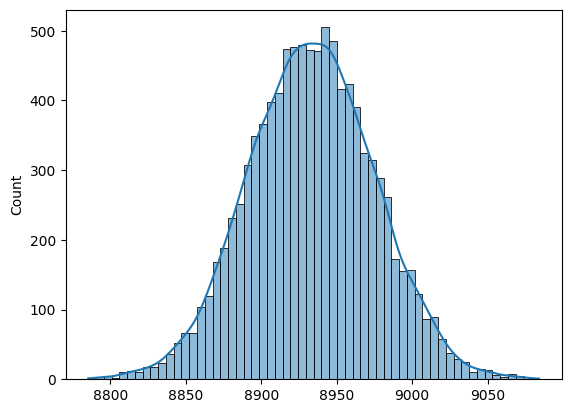

In [40]:
sns.histplot(bs_group1_mean, kde=True)

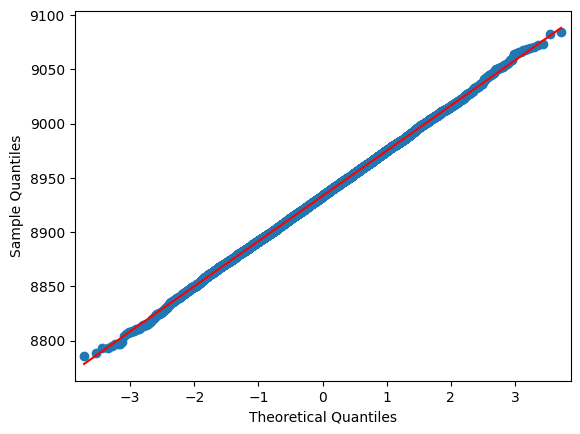

In [41]:
#Confirmation of the normal distribution
qqplot(pd.Series(bs_group1_mean), line='s')
plt.show()

In [42]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_group1_mean, 2.5),2)
upper = round(np.percentile(bs_group1_mean, 97.5),2)
print(f'Confidence Interval of group1 spending: {lower, upper}')

Confidence Interval of group1 spending: (8851.45, 9014.24)


#### Analysis for Group2

In [43]:
# Bootsrapping Group2 data
bs_group2_mean = []
for i in range(10000):
    bs_size = len(group2)
    bs_sample = np.random.choice(group2['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_group2_mean.append(bs_mean)

<Axes: ylabel='Count'>

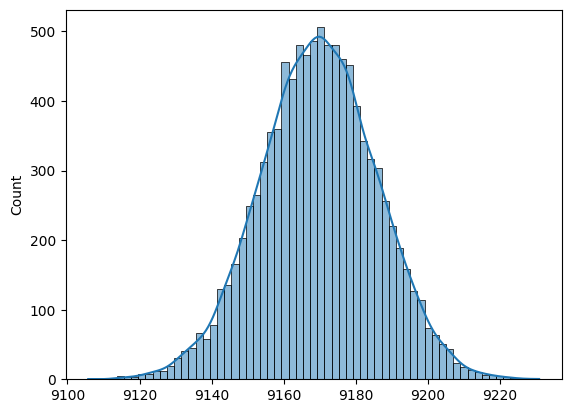

In [44]:
sns.histplot(bs_group2_mean, kde=True)

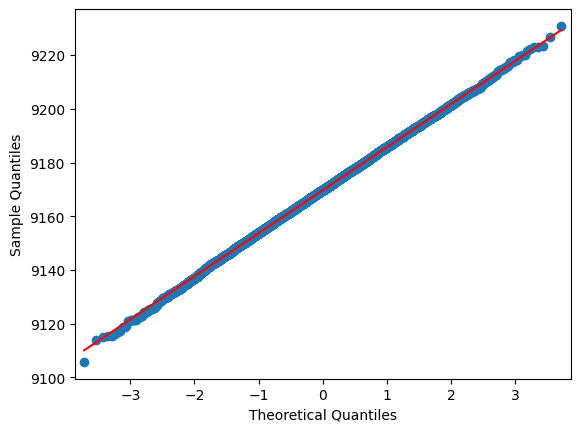

In [45]:
#Confirmation of the normal distribution
qqplot(pd.Series(bs_group2_mean), line='s')
plt.show()

In [46]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_group2_mean, 2.5),2)
upper = round(np.percentile(bs_group2_mean, 97.5),2)
print(f'Confidence Interval of group2 spending: {lower, upper}')

Confidence Interval of group2 spending: (9137.48, 9200.93)


#### Analysis for Group3

In [47]:
# Bootsrapping Group3 data
bs_group3_mean = []
for i in range(10000):
    bs_size = len(group3)
    bs_sample = np.random.choice(group3['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_group3_mean.append(bs_mean)

<Axes: ylabel='Count'>

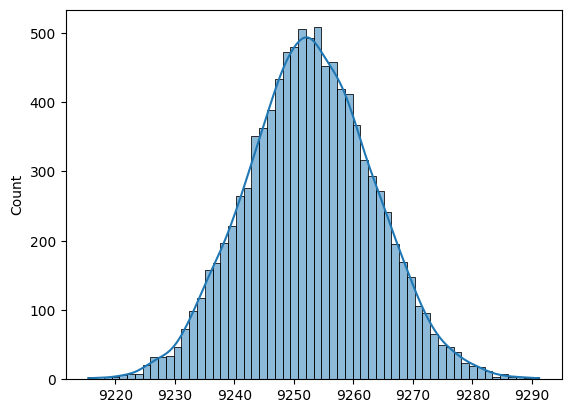

In [48]:
sns.histplot(bs_group3_mean, kde=True)

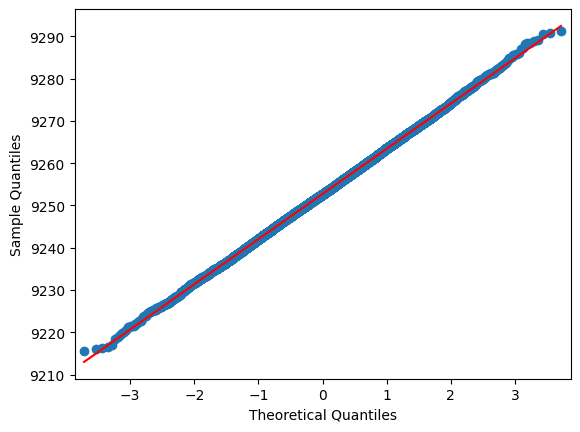

In [49]:
#Confirmation of the normal distribution
qqplot(pd.Series(bs_group3_mean), line='s')
plt.show()

In [50]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_group3_mean, 2.5),2)
upper = round(np.percentile(bs_group3_mean, 97.5),2)
print(f'Confidence Interval of group3 spending: {lower, upper}')

Confidence Interval of group3 spending: (9232.08, 9273.72)


#### Analysis for Group4

In [51]:
# Bootsrapping Group4 data
bs_group4_mean = []
for i in range(10000):
    bs_size = len(group4)
    bs_sample = np.random.choice(group4['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_group4_mean.append(bs_mean)

<Axes: ylabel='Count'>

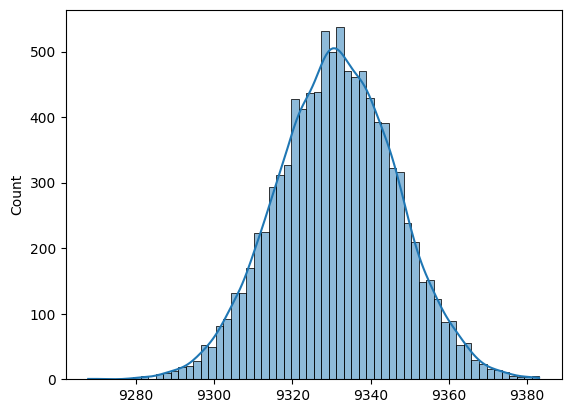

In [52]:
sns.histplot(bs_group4_mean, kde=True)

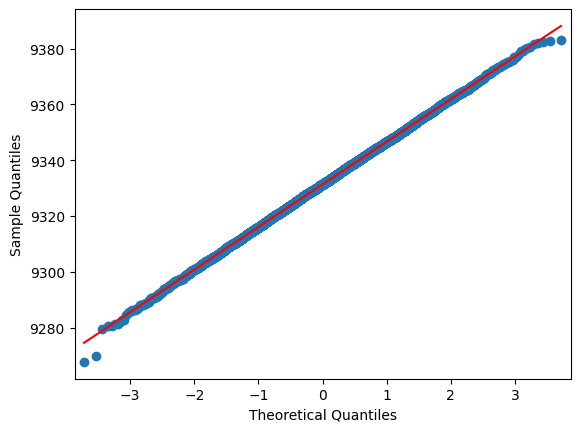

In [53]:
#Confirmation of the normal distribution
qqplot(pd.Series(bs_group4_mean), line='s')
plt.show()

In [54]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_group4_mean, 2.5),2)
upper = round(np.percentile(bs_group4_mean, 97.5),2)
print(f'Confidence Interval of group4 spending: {lower, upper}')

Confidence Interval of group4 spending: (9301.34, 9361.28)


#### Analysis for Group5

In [55]:
# Bootsrapping Group5 data
bs_group5_mean = []
for i in range(10000):
    bs_size = len(group5)
    bs_sample = np.random.choice(group5['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_group5_mean.append(bs_mean)

<Axes: ylabel='Count'>

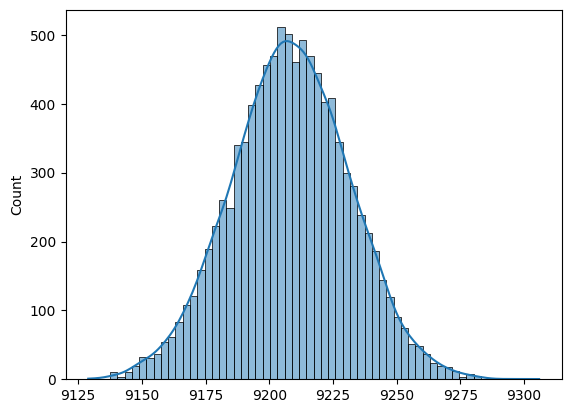

In [56]:
sns.histplot(bs_group5_mean, kde=True)

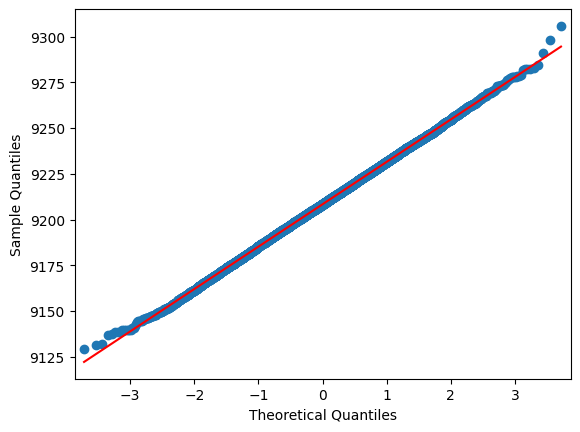

In [57]:
#Confirmation of the normal distribution
qqplot(pd.Series(bs_group5_mean), line='s')
plt.show()

In [58]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_group5_mean, 2.5),2)
upper = round(np.percentile(bs_group5_mean, 97.5),2)
print(f'Confidence Interval of group5 spending: {lower, upper}')

Confidence Interval of group5 spending: (9162.36, 9253.75)


#### Analysis for Group6

In [59]:
# Bootsrapping Group6 data
bs_group6_mean = []
for i in range(10000):
    bs_size = len(group6)
    bs_sample = np.random.choice(group6['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_group6_mean.append(bs_mean)

<Axes: ylabel='Count'>

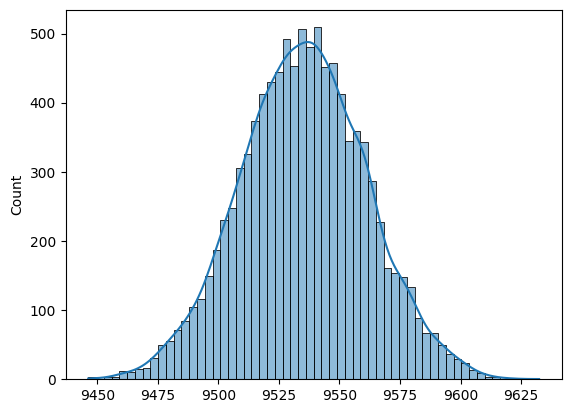

In [60]:
sns.histplot(bs_group6_mean, kde=True)

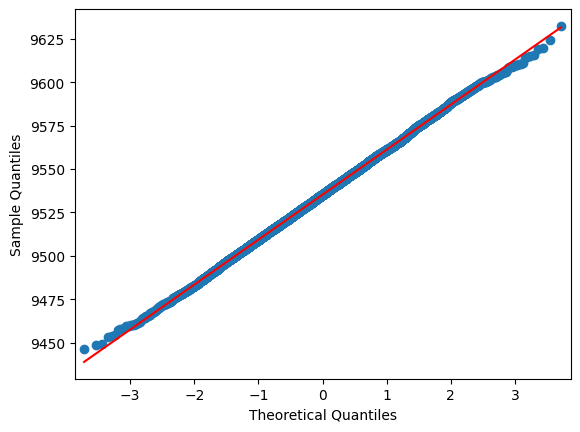

In [61]:
#Confirmation of the normal distribution
qqplot(pd.Series(bs_group6_mean), line='s')
plt.show()

In [62]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_group6_mean, 2.5),2)
upper = round(np.percentile(bs_group6_mean, 97.5),2)
print(f'Confidence Interval of group6 spending: {lower, upper}')

Confidence Interval of group6 spending: (9483.76, 9587.07)


#### Analysis for Group7

In [63]:
# Bootsrapping Group7 data
bs_group7_mean = []
for i in range(10000):
    bs_size = len(group7)
    bs_sample = np.random.choice(group7['Purchase'], size = bs_size)
    bs_mean = np.mean(bs_sample)
    bs_group7_mean.append(bs_mean)

<Axes: ylabel='Count'>

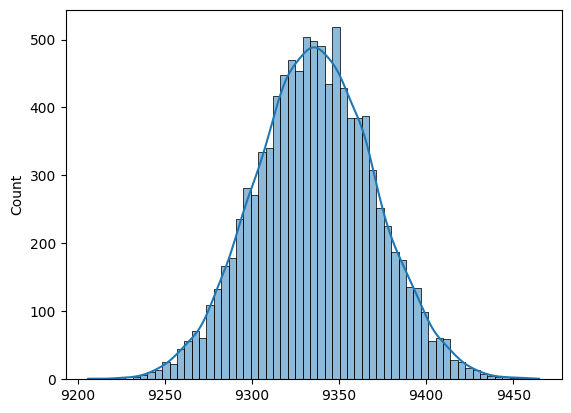

In [64]:
sns.histplot(bs_group7_mean, kde=True)

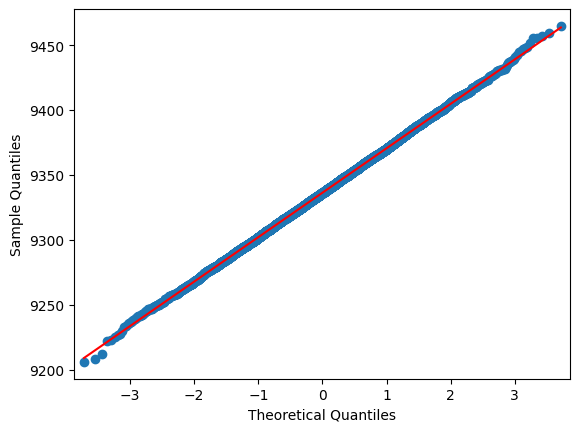

In [65]:
#Confirmation of the normal distribution
qqplot(pd.Series(bs_group7_mean), line='s')
plt.show()

In [66]:
# Calculating the confidence interval at 95% confidence level
lower = round(np.percentile(bs_group7_mean, 2.5),2)
upper = round(np.percentile(bs_group7_mean, 97.5),2)
print(f'Confidence Interval of group7 spending: {lower, upper}')

Confidence Interval of group7 spending: (9269.17, 9403.62)


- Confidence Interval of group1 spending: (8852.61, 9013.05)
- Confidence Interval of group2 spending: (9138.82, 9201.28)
- Confidence Interval of group3 spending: (9234.8, 9269.99)
- Confidence Interval of group4 spending: (9301.64, 9360.99)
- Confidence Interval of group5 spending: (9163.1, 9254.17)
- Confidence Interval of group6 spending: (9484.78, 9585.59)
- Confidence Interval of group7 spending: (9269.12, 9402.61)

## Age Group Analysis Insights:


- Age 0-17: Customers in the age group 0-17 have an estimated average spending between  8,852.61 dollars and 9,013.05 dollars. This group likely consists of younger customers or parents buying for their children. Walmart could focus on promoting family-oriented products and ensuring a child-friendly shopping experience.

- Age 18-25: Customers aged 18-25 exhibit an average spending range of 9,138.82 dollars  to 9,201.28 dollars. This demographic might include college students and young adults. Walmart could tailor marketing campaigns to cater to their preferences, such as promoting electronics, fashion, and convenience products.

- Age 26-35: Customers aged 26-35 have an average spending range of 9,234.80 dollars to 9,269.99 dollars. This age group often includes young professionals and families. Walmart could target them with offers on household essentials, groceries, and lifestyle products.

- Age 36-45: Customers aged 36-45 show an estimated average spending between 9,301.64 dollars and 9,360.99 dollars. This segment could include established families and individuals in their prime earning years. Walmart could focus on providing value for family-oriented products and services.

- Age 46-50: Customers aged 46-50 have an average spending range of 9,163.10 dollars to 9,254.17 dollars. This demographic could include middle-aged individuals with varying needs. Walmart might consider offering a diverse range of products and promotions to cater to their preferences.

- Age 51-55: Customers aged 51-55 exhibit an average spending range of 9,484.78 dollars to 9,585.59 dollars. This group may consist of pre-retirement individuals. Walmart could target them with offerings related to health and wellness, leisure, and retirement planning.

- Age 55+: Customers aged 55 and above have an average spending range of 9,269.12 dollars to 9,402.61 dollars. This demographic might include retirees and older adults. Walmart could focus on providing products and services that meet the unique needs of this segment, such as healthcare, leisure, and home improvement.

- Overall, there is an observable trend where the average spending tends to increase as the age group advances.

## Recommendations:

- Segmented Marketing: Leverage the insights from the age group analysis to create targeted marketing campaigns. Tailor promotions, advertisements, and product recommendations to align with the preferences and needs of each age group.

- Product Assortment: Optimize product assortment based on the spending patterns of different age groups. Ensure that the products most relevant to each demographic are readily available and well-promoted.

- In-Store Experience: Customize the in-store experience to cater to the preferences of different age groups. For example, create special sections or events that appeal to younger or older shoppers.

- Customer Engagement: Engage with customers through social media and digital platforms, targeting content that resonates with specific age groups. Use customer feedback to continuously refine and enhance offerings.

- Overall, the age group analysis provides valuable insights into the spending habits of different customer segments. By tailoring strategies and offerings to these segments, Walmart can enhance customer satisfaction, increase sales, and foster long-term customer loyalty.

# Overall Recommendations and action items
Based on the insights gained from the analyses of customer spending behavior, gender, age, and marital status, here are some recommendations and action items that Walmart can consider:

#### 1. Targeted Marketing and Personalization:

- Recommendation: Leverage the insights from gender and age group analyses to create targeted marketing campaigns.
- Action Items: Tailor promotions, advertisements, and product recommendations to align with the preferences and needs of each gender and age group. Use data-driven insights to deliver relevant offers and recommendations.

#### 2. In-Store Experience Customization:

- Recommendation: Customize the in-store experience to cater to the preferences of different customer segments.
- Action Items: Create special sections, events, or displays that appeal to the preferences of different genders, age groups, and marital statuses. Enhance the shopping environment to create a personalized experience.

#### 3. Personalized Customer Engagement:

- Recommendation: Implement personalized marketing strategies that consider individual customer characteristics.
- Action Items: Use customer data to deliver personalized offers, recommendations, and promotions via email, mobile apps, or in-store interactions. Increase customer engagement and satisfaction through tailored communication.


#### 4. Community and Cause Marketing:

- Recommendation: Engage with customer segments that align with specific causes or values.
- Action Items: Support community initiatives, environmental causes, or social responsibility campaigns that resonate with certain age groups, genders, or demographics. Build brand loyalty through shared values.

In summary, Walmart can use the insights gained from customer spending behavior analyses to tailor its strategies and offerings to the preferences and needs of different customer segments. By personalizing the shopping experience, optimizing product assortment, Walmart can enhance customer satisfaction, increase sales, and foster long-term customer loyalty. 